In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import re

In [43]:
# NOTE : ここに解析したいデータのフォルダを指定してください
RANDOM_FOLDER_PATH = "../../PLATEAUTutorial/Assets/2025_02_06-00_51_24-random"
MODEL_FOLDER_PATH = "../../PLATEAUTutorial/Assets/2025_02_06-01_34_46-model2"

In [44]:
# csvファイルを読み込む
csv_paths = glob.glob(os.path.join(RANDOM_FOLDER_PATH, "*.csv"))
dfs = []

for path in csv_paths:
    match = re.search(r"EvaRatesPerSec_Episode_(\d+)", path)
    if match:
        episode_num = int(match.group(1))
        df = pd.read_csv(path)
        print(f"Episode {episode_num} : {len(df)}")
        df["episode"] = episode_num
        dfs.append(df)

merged_random_df = pd.concat(dfs, ignore_index=True)
merged_random_df

Episode 0 : 89944
Episode 1 : 89944
Episode 10 : 89944
Episode 11 : 89944
Episode 12 : 89944
Episode 13 : 89944
Episode 14 : 89944
Episode 15 : 89944
Episode 16 : 89944
Episode 17 : 89944
Episode 18 : 89944
Episode 19 : 89944
Episode 2 : 89944
Episode 20 : 89944
Episode 21 : 89944
Episode 22 : 89944
Episode 23 : 89944
Episode 24 : 89944
Episode 25 : 89944
Episode 26 : 89944
Episode 27 : 89944
Episode 28 : 89944
Episode 29 : 89944
Episode 3 : 89944
Episode 30 : 89944
Episode 31 : 89944
Episode 32 : 89944
Episode 33 : 89944
Episode 4 : 89944
Episode 5 : 89944
Episode 6 : 89944
Episode 7 : 89944
Episode 8 : 89944
Episode 9 : 89944


,Time,EvacuationRate,episode
0,0.020,0.00,0
1,0.040,0.00,0
2,0.060,0.00,0
3,0.080,0.00,0
4,0.100,0.00,0
...,...,...,...
3058091,1799.934,0.36,9
3058092,1799.954,0.36,9
3058093,1799.974,0.36,9
3058094,1799.994,0.36,9


In [47]:
# モデル用のデータも読み込む
# csvファイルを読み込む
csv_paths = glob.glob(os.path.join(MODEL_FOLDER_PATH, "*.csv"))
dfs = []

for path in csv_paths:
    match = re.search(r"EvaRatesPerSec_Episode_(\d+)", path)
    if match:
        episode_num = int(match.group(1))
        df = pd.read_csv(path)
        print(f"Episode {episode_num} : {len(df)}")
        df["episode"] = episode_num
        dfs.append(df)

merged_model_df = pd.concat(dfs, ignore_index=True)
merged_model_df


Episode 0 : 89944
Episode 1 : 89944
Episode 10 : 89944
Episode 11 : 89944
Episode 12 : 89944
Episode 13 : 89944
Episode 14 : 89944
Episode 15 : 89944
Episode 16 : 89944
Episode 17 : 89944
Episode 18 : 89944
Episode 19 : 89944
Episode 2 : 89944
Episode 20 : 89944
Episode 21 : 89944
Episode 22 : 89944
Episode 23 : 89944
Episode 24 : 89944
Episode 25 : 89944
Episode 26 : 89944
Episode 27 : 89944
Episode 28 : 89944
Episode 29 : 89944
Episode 3 : 89944
Episode 30 : 89944
Episode 31 : 89944
Episode 32 : 89944
Episode 4 : 89944
Episode 5 : 89944
Episode 6 : 89944
Episode 7 : 89944
Episode 8 : 89944
Episode 9 : 89944


,Time,EvacuationRate,episode
0,0.020,0.00,0
1,0.040,0.00,0
2,0.060,0.00,0
3,0.080,0.00,0
4,0.100,0.00,0
...,...,...,...
2968147,1799.934,0.53,9
2968148,1799.954,0.53,9
2968149,1799.974,0.53,9
2968150,1799.994,0.53,9


In [48]:
# エピソード番号でソート
merged_random_df = merged_random_df.sort_values("episode")
merged_model_df = merged_model_df.sort_values("episode")

f:\syu\Products\PLATEAU-Tutorial\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


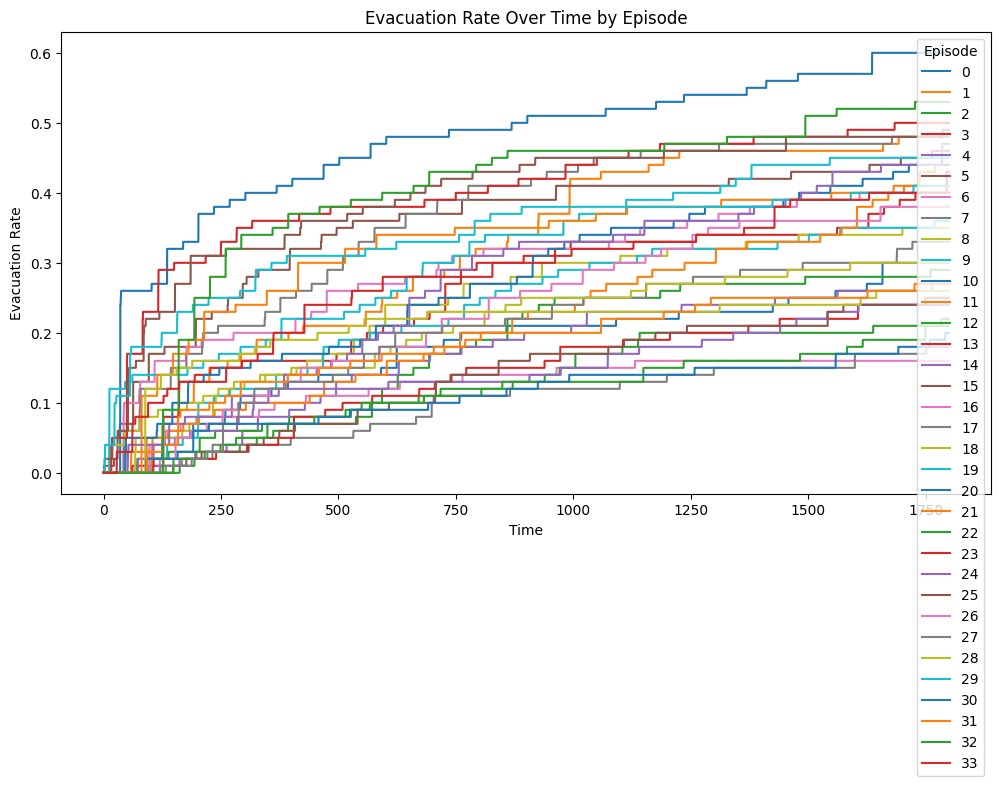

f:\syu\Products\PLATEAU-Tutorial\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


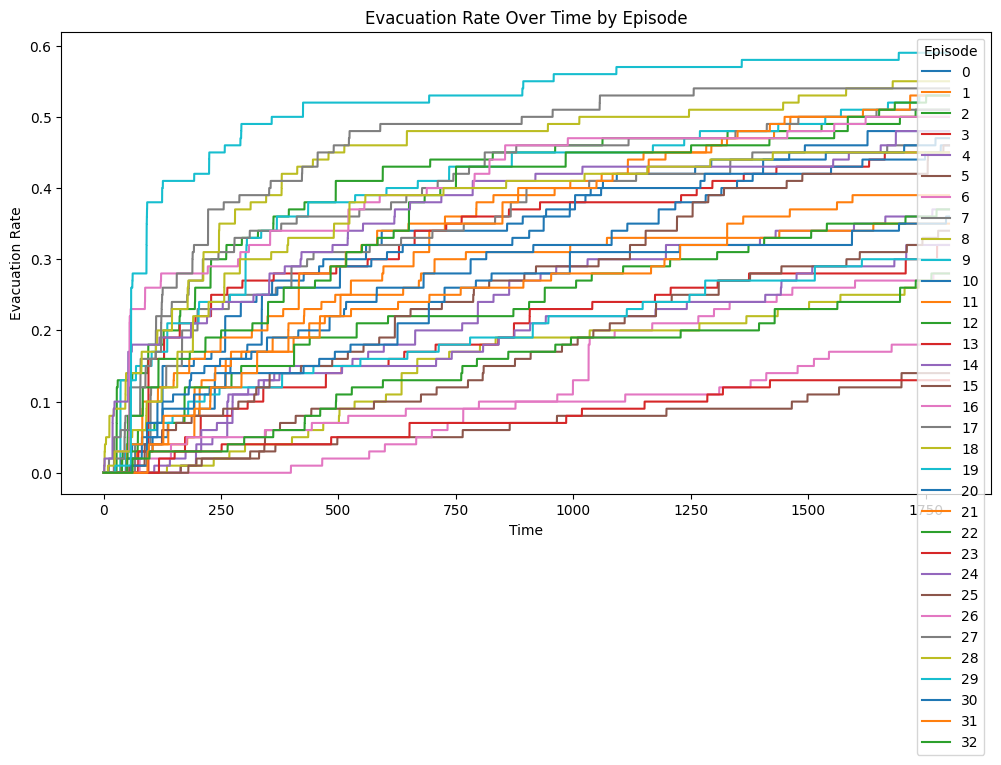

In [49]:
# ランダム版：単位時間ごとの避難率可視化
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_random_df, x='Time', y='EvacuationRate', hue='episode', palette='tab10')
plt.title('Evacuation Rate Over Time by Episode')
plt.xlabel('Time')
plt.ylabel('Evacuation Rate')
plt.legend(title='Episode')
plt.show()

# モデル版：単位時間ごとの避難率可視化
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_model_df, x='Time', y='EvacuationRate', hue='episode', palette='tab10')
plt.title('Evacuation Rate Over Time by Episode')
plt.xlabel('Time')
plt.ylabel('Evacuation Rate')
plt.legend(title='Episode')
plt.show()

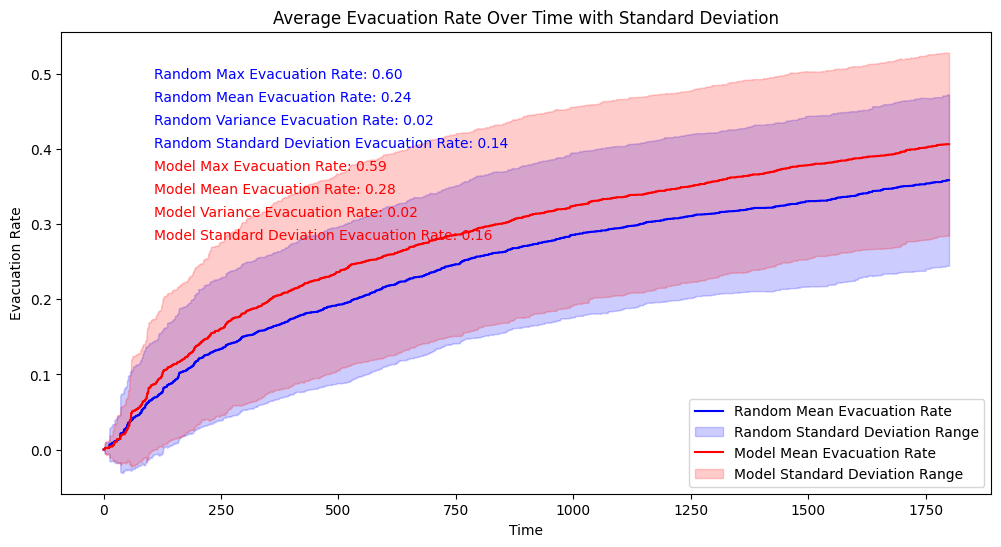

In [50]:
# 各時間ごとの避難率の平均、分散、標準偏差を計算
evacuation_stats_random = merged_random_df.groupby('Time')['EvacuationRate'].agg(['mean', 'var', 'std']).reset_index()
evacuation_stats_model = merged_model_df.groupby('Time')['EvacuationRate'].agg(['mean', 'var', 'std']).reset_index()

# 平均値と標準偏差の範囲を計算
evacuation_stats_random['lower'] = evacuation_stats_random['mean'] - evacuation_stats_random['std']
evacuation_stats_random['upper'] = evacuation_stats_random['mean'] + evacuation_stats_random['std']
evacuation_stats_model['lower'] = evacuation_stats_model['mean'] - evacuation_stats_model['std']
evacuation_stats_model['upper'] = evacuation_stats_model['mean'] + evacuation_stats_model['std']

# グラフを作成
plt.figure(figsize=(12, 6))
sns.lineplot(data=evacuation_stats_random, x='Time', y='mean', label='Random Mean Evacuation Rate', color='blue')
plt.fill_between(evacuation_stats_random['Time'], evacuation_stats_random['lower'], evacuation_stats_random['upper'], color='blue', alpha=0.2, label='Random Standard Deviation Range')
sns.lineplot(data=evacuation_stats_model, x='Time', y='mean', label='Model Mean Evacuation Rate', color='red')
plt.fill_between(evacuation_stats_model['Time'], evacuation_stats_model['lower'], evacuation_stats_model['upper'], color='red', alpha=0.2, label='Model Standard Deviation Range')
plt.title('Average Evacuation Rate Over Time with Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Evacuation Rate')
plt.legend()

# 最終的な避難率の最大値,平均値,分散,標準偏差をグラフ内に表示
max_evacuation_rate_random = merged_random_df['EvacuationRate'].max()
mean_evacuation_rate_random = merged_random_df['EvacuationRate'].mean()
var_evacuation_rate_random = merged_random_df['EvacuationRate'].var()
std_evacuation_rate_random = merged_random_df['EvacuationRate'].std()

max_evacuation_rate_model = merged_model_df['EvacuationRate'].max()
mean_evacuation_rate_model = merged_model_df['EvacuationRate'].mean()
var_evacuation_rate_model = merged_model_df['EvacuationRate'].var()
std_evacuation_rate_model = merged_model_df['EvacuationRate'].std()

plt.text(0.1, 0.9, f'Random Max Evacuation Rate: {max_evacuation_rate_random:.2f}', transform=plt.gca().transAxes, color='blue')
plt.text(0.1, 0.85, f'Random Mean Evacuation Rate: {mean_evacuation_rate_random:.2f}', transform=plt.gca().transAxes, color='blue')
plt.text(0.1, 0.8, f'Random Variance Evacuation Rate: {var_evacuation_rate_random:.2f}', transform=plt.gca().transAxes, color='blue')
plt.text(0.1, 0.75, f'Random Standard Deviation Evacuation Rate: {std_evacuation_rate_random:.2f}', transform=plt.gca().transAxes, color='blue')

plt.text(0.1, 0.7, f'Model Max Evacuation Rate: {max_evacuation_rate_model:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.1, 0.65, f'Model Mean Evacuation Rate: {mean_evacuation_rate_model:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.1, 0.6, f'Model Variance Evacuation Rate: {var_evacuation_rate_model:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.1, 0.55, f'Model Standard Deviation Evacuation Rate: {std_evacuation_rate_model:.2f}', transform=plt.gca().transAxes, color='red')


plt.show()

In [51]:
# ランダム版のエージェントの行動ログを読み込む
random_action_log_paths = glob.glob(os.path.join(RANDOM_FOLDER_PATH, "ActionLog_Episode_*.csv"))
random_action_dfs = []

for path in random_action_log_paths:
    match = re.search(r"ActionLog_Episode_(\d+)", path)
    if match:
        episode_num = int(match.group(1))
        df = pd.read_csv(path)
        df["episode"] = episode_num
        print(f"Random Episode {episode_num} : {len(df)}")
        random_action_dfs.append(df)

random_action_merged_df = pd.concat(random_action_dfs, ignore_index=True)

# モデル版のエージェントの行動ログを読み込む
model_action_log_paths = glob.glob(os.path.join(MODEL_FOLDER_PATH, "ActionLog_Episode_*.csv"))
model_action_dfs = []

for path in model_action_log_paths:
    match = re.search(r"ActionLog_Episode_(\d+)", path)
    if match:
        episode_num = int(match.group(1))
        df = pd.read_csv(path)
        df["episode"] = episode_num
        print(f"Model Episode {episode_num} : {len(df)}")
        model_action_dfs.append(df)

model_action_merged_df = pd.concat(model_action_dfs, ignore_index=True)

random_action_merged_df, model_action_merged_df

Random Episode 0 : 1
Random Episode 1 : 1
Random Episode 10 : 1
Random Episode 11 : 1
Random Episode 12 : 1
Random Episode 13 : 1
Random Episode 14 : 1
Random Episode 15 : 1
Random Episode 16 : 1
Random Episode 17 : 1
Random Episode 18 : 1
Random Episode 19 : 1
Random Episode 2 : 1
Random Episode 20 : 1
Random Episode 21 : 1
Random Episode 22 : 1
Random Episode 23 : 1
Random Episode 24 : 1
Random Episode 25 : 1
Random Episode 26 : 1
Random Episode 27 : 1
Random Episode 28 : 1
Random Episode 29 : 1
Random Episode 3 : 1
Random Episode 30 : 1
Random Episode 31 : 1
Random Episode 32 : 1
Random Episode 33 : 1
Random Episode 4 : 1
Random Episode 5 : 1
Random Episode 6 : 1
Random Episode 7 : 1
Random Episode 8 : 1
Random Episode 9 : 1
Model Episode 0 : 1
Model Episode 1 : 1
Model Episode 10 : 1
Model Episode 11 : 1
Model Episode 12 : 1
Model Episode 13 : 1
Model Episode 14 : 1
Model Episode 15 : 1
Model Episode 16 : 1
Model Episode 17 : 1
Model Episode 18 : 1
Model Episode 19 : 1
Model Episod

(    Episode  Step  bldg_c07de3cc-4614-4aff-92dd-78c1862b4a78  \
 0         0     0                                          0   
 1         1     0                                          1   
 2        10     0                                          1   
 3        11     0                                          1   
 4        12     0                                          1   
 5        13     0                                          1   
 6        14     0                                          0   
 7        15     0                                          1   
 8        16     0                                          0   
 9        17     0                                          1   
 10       18     0                                          0   
 11       19     0                                          1   
 12        2     0                                          0   
 13       20     0                                          0   
 14       21     0       

In [52]:
# エピソード番号でソート
random_action_merged_df = random_action_merged_df.sort_values("episode")
model_action_merged_df = model_action_merged_df.sort_values("episode")

<Figure size 1400x700 with 0 Axes>

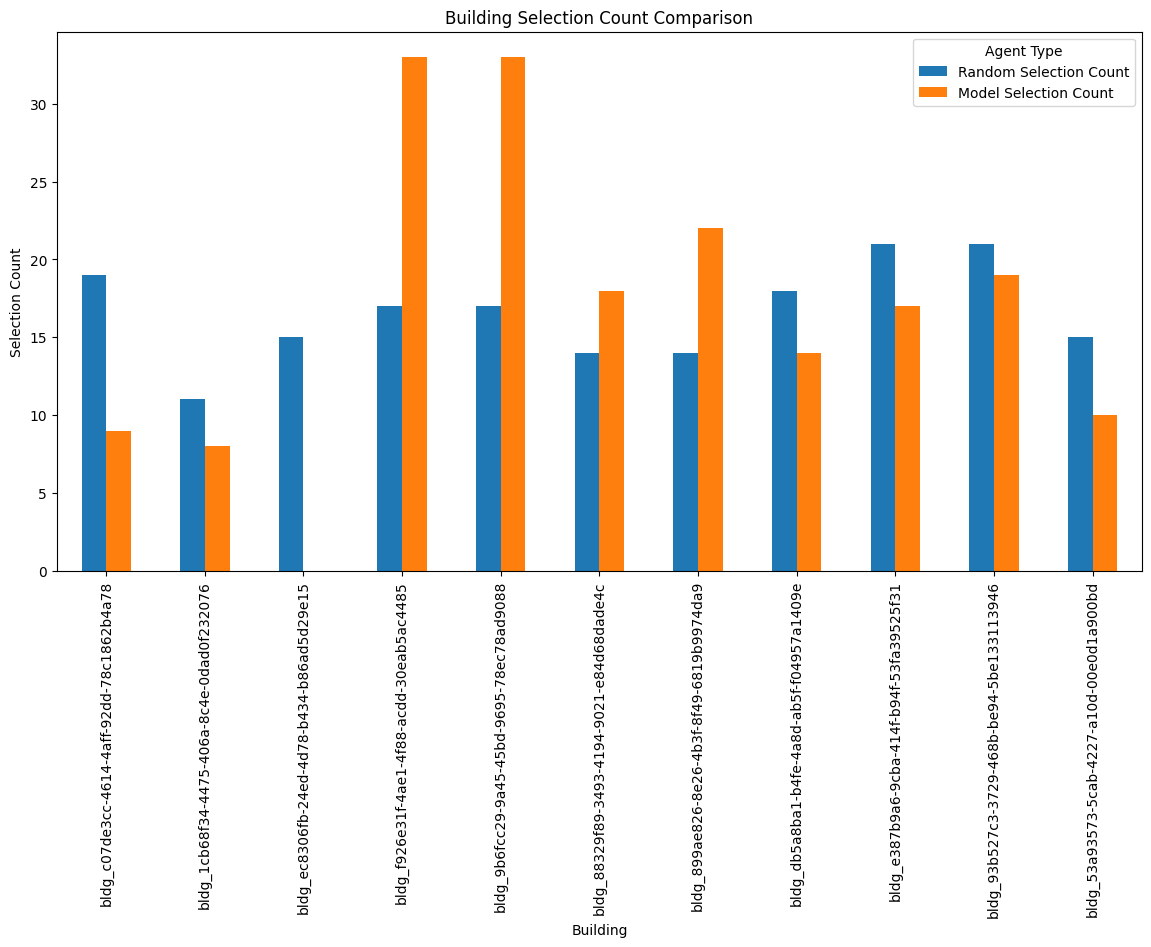

In [55]:
# 各建物の選択回数を計算
random_counts = random_action_merged_df.drop(columns=['Episode', 'Step', 'episode', 'type']).sum().reset_index()
random_counts.columns = ['Building', 'Random Selection Count']

model_counts = model_action_merged_df.drop(columns=['Episode', 'Step', 'episode', 'type']).sum().reset_index()
model_counts.columns = ['Building', 'Model Selection Count']

# データフレームをマージして比較
comparison_df = pd.merge(random_counts, model_counts, on='Building')

# 可視化
plt.figure(figsize=(14, 7))
comparison_df.set_index('Building').plot(kind='bar', figsize=(14, 7))
plt.title('Building Selection Count Comparison')
plt.xlabel('Building')
plt.ylabel('Selection Count')
plt.xticks(rotation=90)
plt.legend(title='Agent Type')
plt.show()